In [76]:
# Include proper libraries and scripts
using Flux
using LinearAlgebra
using Plots
using JSON
include("readclassjson.jl")
include("regression_fit.jl")

# Read in data from json files
data1 = readclassjson("non_quadratic.json")
data2 = readclassjson("residual_props.json")

# Parse and embed data read from json files

# non_quadratic.json
U_train1 = data1["U_train"]
v_train1 = data1["v_train"]
U_test1 = data1["U_test"]
v_test1 = data1["v_test"]

X_tr1 = [ones(size(U_train1)[1], 1)  U_train1]
X_te1 = [ones(size(U_test1)[1], 1)  U_test1]
Y_tr1 = v_train1
Y_te1 = v_test1

# residual_props.json
U_train2 = data2["U_train"]
v_train2 = data2["v_train"]
U_test2 = data2["U_test"]
v_test2 = data2["v_test"]

X_tr2 = [ones(size(U_train2)[1], 1) U_train2]
X_te2 = [ones(size(U_test2)[1], 1)  U_test2]
Y_tr2 = v_train2
Y_te2 = v_test2

500-element Array{Float64,1}:
  -4.438501889126882  
   0.5594506309529232 
   2.0750545601532058 
   1.4400431923248298 
  -1.6599033383620996 
  -0.09953618412070572
  -4.437996001869989  
  -0.36132651741755767
  -2.0554077944019444 
 -15.978746279610993  
 -10.350382192031846  
  -3.643679606107295  
   2.443206412014094  
   ⋮                  
  -4.131818209155858  
   4.138159119174317  
   3.0458703227739257 
   0.679054335238295  
  -0.659021932592424  
  -0.3039236377871142 
  -4.083795389876711  
 -14.660273095232764  
  -4.450686647657978  
  -0.5712073476024715 
   0.19318955249619219
   1.8144926986316525 

In [77]:
# Create loss functions for question 1
function l_quad(y_hat, y)
    loss = (y_hat - y)^2
    return loss
end

function l_abs(y_hat, y)
    loss = abs(y_hat - y)
    return loss
end

function l_hub1(y_hat, y)
    r = y_hat - y
    alpha = 0.5
    loss = 1
    if abs(r) <= alpha
        loss = r^2 
    else
        loss = alpha * (2 * abs(r) - alpha)
    end
    return loss
end

function l_hub2(y_hat, y)
    r = y_hat - y
    alpha = 1
    loss = 1
    if abs(r) <= alpha
        loss = r^2 
    else
        loss = alpha * (2 * abs(r) - alpha)
    end
    return loss
end

function l_hub3(y_hat, y)
    r = y_hat - y
    alpha = 2
    loss = 1
    if abs(r) <= alpha
        loss = r^2 
    else
        loss = alpha * (2 * abs(r) - alpha)
    end
    return loss
end

function l_loghub1(y_hat, y)
    r = y_hat .- y
    loss = 1
    alpha = 0.5
    if abs(r) <= alpha
        loss = r^2 
    else
        loss = alpha * (1 - (2 * log(alpha)) + log(r^2))
    end
    return loss
end

function l_loghub2(y_hat, y)
    r = y_hat .- y
    loss = 1
    alpha = 1
    if abs(r) <= alpha
        loss = r^2 
    else
        loss = alpha * (1 - (2 * log(alpha)) + log(r^2))
    end
    return loss
end

function l_loghub3(y_hat, y)
    r = y_hat .- y
    loss = 1
    alpha = 2
    if abs(r) <= alpha
        loss = r^2 
    else
        loss = alpha * (1 - (2 * log(alpha)) + log(r^2))
    end
    return loss
end

l_loghub3 (generic function with 1 method)

In [78]:
# Question 1
# Train models in order to get the predictors 
lam = 1
r(theta) = 0
theta_Q = regression_fit(X_tr1, Y_tr1, l_quad, r, lam)
theta_A = regression_fit(X_tr1, Y_tr1, l_abs, r, lam) 
theta_H1 = regression_fit(X_tr1, Y_tr1, l_hub1, r, lam) 
theta_H2 = regression_fit(X_tr1, Y_tr1, l_hub2, r, lam) 
theta_H3 = regression_fit(X_tr1, Y_tr1, l_hub3, r, lam) 
theta_LH1 = regression_fit(X_tr1, Y_tr1, l_loghub1, r, lam)
theta_LH2 = regression_fit(X_tr1, Y_tr1, l_loghub2, r, lam)
theta_LH3 = regression_fit(X_tr1, Y_tr1, l_loghub3, r, lam)


┌ Info: Epoch 1
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 2
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 3
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 4
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 5
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 6
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 7
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 8
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 9
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 10
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 11
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\s

┌ Info: Epoch 93
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 94
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 95
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 96
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 97
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 98
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 99
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 100
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 101
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 102
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 103
└ @ Main C:\Users\thejo\.julia\packages

┌ Info: Epoch 189
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 190
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 191
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 192
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 193
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 194
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 195
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 196
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 197
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 198
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 199
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 280
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 281
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 282
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 283
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 284
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 285
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 286
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 287
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 288
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 289
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 290
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 372
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 373
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 374
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 375
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 376
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 377
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 378
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 379
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 380
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 381
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 382
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 459
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 460
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 461
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 462
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 463
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 464
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 465
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 466
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 467
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 468
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 469
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 54
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 55
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 56
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 57
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 58
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 59
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 60
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 61
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 62
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 63
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 64
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 155
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 156
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 157
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 158
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 159
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 160
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 161
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 162
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 163
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 164
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 165
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 244
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 245
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 246
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 247
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 248
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 249
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 250
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 251
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 252
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 253
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 254
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 340
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 341
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 342
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 343
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 344
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 345
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 346
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 347
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 348
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 349
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 350
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 429
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 430
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 431
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 432
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 433
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 434
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 435
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 436
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 437
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 438
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 439
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 16
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 17
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 18
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 19
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 20
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 21
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 22
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 23
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 24
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 25
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 26
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 107
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 108
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 109
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 110
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 111
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 112
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 113
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 114
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 115
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 116
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 117
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 194
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 195
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 196
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 197
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 198
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 199
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 200
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 201
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 202
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 203
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 204
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 282
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 283
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 284
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 285
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 286
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 287
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 288
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 289
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 290
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 291
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 292
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 371
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 372
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 373
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 374
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 375
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 376
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 377
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 378
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 379
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 380
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 381
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 459
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 460
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 461
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 462
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 463
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 464
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 465
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 466
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 467
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 468
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 469
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 48
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 49
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 50
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 51
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 52
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 53
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 54
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 55
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 56
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 57
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 58
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 137
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 138
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 139
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 140
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 141
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 142
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 143
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 144
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 145
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 146
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 147
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 225
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 226
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 227
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 228
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 229
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 230
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 231
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 232
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 233
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 234
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 235
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 314
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 315
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 316
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 317
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 318
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 319
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 320
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 321
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 322
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 323
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 324
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 402
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 403
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 404
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 405
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 406
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 407
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 408
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 409
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 410
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 411
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 412
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 494
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 495
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 496
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 497
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 498
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 499
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 500
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 1
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 2
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 3
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 4
└ @ Main C:\Users\thejo\.julia\packages\

┌ Info: Epoch 84
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 85
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 86
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 87
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 88
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 89
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 90
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 91
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 92
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 93
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 94
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 176
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 177
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 178
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 179
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 180
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 181
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 182
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 183
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 184
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 185
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 186
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 267
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 268
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 269
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 270
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 271
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 272
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 273
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 274
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 275
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 276
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 277
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 357
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 358
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 359
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 360
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 361
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 362
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 363
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 364
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 365
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 366
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 367
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 447
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 448
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 449
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 450
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 451
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 452
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 453
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 454
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 455
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 456
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 457
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 36
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 37
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 38
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 39
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 40
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 41
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 42
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 43
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 44
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 45
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 46
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 123
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 124
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 125
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 126
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 127
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 128
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 129
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 130
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 131
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 132
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 133
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 212
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 213
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 214
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 215
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 216
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 217
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 218
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 219
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 220
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 221
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 222
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 299
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 300
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 301
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 302
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 303
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 304
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 305
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 306
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 307
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 308
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 309
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 389
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 390
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 391
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 392
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 393
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 394
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 395
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 396
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 397
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 398
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 399
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 482
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 483
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 484
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 485
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 486
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 487
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 488
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 489
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 490
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 491
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 492
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 70
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 71
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 72
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 73
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 74
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 75
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 76
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 77
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 78
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 79
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 80
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 160
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 161
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 162
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 163
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 164
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 165
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 166
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 167
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 168
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 169
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 170
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 252
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 253
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 254
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 255
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 256
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 257
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 258
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 259
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 260
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 261
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 262
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 345
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 346
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 347
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 348
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 349
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 350
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 351
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 352
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 353
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 354
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 355
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 436
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 437
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 438
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 439
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 440
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 441
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 442
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 443
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 444
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 445
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 446
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 23
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 24
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 25
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 26
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 27
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 28
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 29
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 30
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 31
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 32
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 33
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 111
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 112
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 113
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 114
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 115
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 116
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 117
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 118
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 119
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 120
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 121
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 200
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 201
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 202
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 203
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 204
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 205
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 206
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 207
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 208
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 209
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 210
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 291
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 292
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 293
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 294
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 295
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 296
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 297
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 298
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 299
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 300
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 301
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 382
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 383
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 384
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 385
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 386
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 387
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 388
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 389
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 390
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 391
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 392
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 469
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 470
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 471
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 472
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 473
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 474
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 475
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 476
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 477
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 478
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 479
└ @ Main C:\Users\thejo\.julia\p

301-element Array{Float64,1}:
  0.3035806106853054 
  0.772741237298742  
 -0.17710883750439063
  0.06308917316931523
  0.47109397545906245
 -0.5307327610435842 
 -0.4879101041463829 
  0.07900359253963246
 -0.725421377554887  
  0.5261844568737271 
 -1.0383208025477868 
 -0.7727451426199597 
 -0.7034130691657894 
  ⋮                  
  0.9090266760758562 
  1.318739437931515  
 -0.40873821486606754
  0.9964481754071808 
  0.6529037140287975 
 -0.8225107677457973 
  0.5313801251330584 
  0.9363603419742625 
 -0.46694056267905176
  0.33875837705497663
  0.3514034162849987 
  0.8155881387337283 

In [79]:
# Calculate training error
loss_Q = zeros(size(X_tr1)[1])
loss_A = zeros(size(X_tr1)[1])
loss_H1 = zeros(size(X_tr1)[1])
loss_H2 = zeros(size(X_tr1)[1])
loss_H3 = zeros(size(X_tr1)[1])
loss_LH1 = zeros(size(X_tr1)[1])
loss_LH2 = zeros(size(X_tr1)[1])
loss_LH3 = zeros(size(X_tr1)[1])

for i = 1:size(X_tr_1)[1]
    loss_Q[i] = (dot(X_tr1[i, :], theta_Q) - Y_tr1[i])^2
    loss_A[i] = (dot(X_tr1[i, :], theta_A) - Y_tr1[i])^2
    loss_H1[i] = (dot(X_tr1[i, :], theta_H1) - Y_tr1[i])^2
    loss_H2[i] = (dot(X_tr1[i, :], theta_H2) - Y_tr1[i])^2
    loss_H3[i] = (dot(X_tr1[i, :], theta_H3) - Y_tr1[i])^2
    loss_LH1[i] = (dot(X_tr1[i, :], theta_LH1) - Y_tr1[i])^2
    loss_LH2[i] = (dot(X_tr1[i, :], theta_LH2) - Y_tr1[i])^2
    loss_LH3[i] = (dot(X_tr1[i, :], theta_LH3) - Y_tr1[i])^2
end

RMSE_Q = sqrt( sum(loss_Q) / length(loss_Q) ) 
RMSE_A = sqrt( sum(loss_A) / length(loss_A) )
RMSE_H1 = sqrt( sum(loss_H1) / length(loss_H1) )
RMSE_H2 = sqrt( sum(loss_H2) / length(loss_H2) )
RMSE_H3 = sqrt( sum(loss_H3) / length(loss_H3) )
RMSE_LH1 = sqrt( sum(loss_LH1) / length(loss_H1) )
RMSE_LH2 = sqrt( sum(loss_LH2) / length(loss_H2) )
RMSE_LH3 = sqrt( sum(loss_LH3) / length(loss_LH3) )

@show RMSE_Q
@show RMSE_A
@show RMSE_H1
@show RMSE_H2
@show RMSE_H3
@show RMSE_LH1
@show RMSE_LH2
@show RMSE_LH3

RMSE_Q = 0.710403380150219
RMSE_A = 0.9254917681700696
RMSE_H1 = 0.820330673889849
RMSE_H2 = 0.7534369599952165
RMSE_H3 = 0.7141234382217772
RMSE_LH1 = 1.0230488917992888
RMSE_LH2 = 0.9260290221845905
RMSE_LH3 = 0.805556106999849


0.805556106999849

In [80]:
# Calculate testing error
loss_Q_test = zeros(size(X_tr_1)[1])
loss_A_test = zeros(size(X_tr_1)[1])
loss_H1_test = zeros(size(X_tr_1)[1])
loss_H2_test = zeros(size(X_tr_1)[1])
loss_H3_test = zeros(size(X_tr_1)[1])
loss_LH1_test = zeros(size(X_tr_1)[1])
loss_LH2_test = zeros(size(X_tr_1)[1])
loss_LH3_test = zeros(size(X_tr_1)[1])

for i = 1:size(X_tr_1)[1]
    loss_Q_test[i] = (dot(X_te_1[i, :], theta_Q) - Y_te_1[i])^2
    loss_A_test[i] = (dot(X_te_1[i, :], theta_A) - Y_te_1[i])^2
    loss_H1_test[i] = (dot(X_te_1[i, :], theta_H1) - Y_te_1[i])^2
    loss_H2_test[i] = (dot(X_te_1[i, :], theta_H2) - Y_te_1[i])^2
    loss_H3_test[i] = (dot(X_te_1[i, :], theta_H3) - Y_te_1[i])^2
    loss_LH1_test[i] = (dot(X_te_1[i, :], theta_LH1) - Y_te_1[i])^2
    loss_LH2_test[i] = (dot(X_te_1[i, :], theta_LH2) - Y_te_1[i])^2
    loss_LH3_test[i] = (dot(X_te_1[i, :], theta_LH3) - Y_te_1[i])^2
end

RMSE_Q_test = sqrt( sum(loss_Q_test) / length(loss_Q_test) ) 
RMSE_A_test = sqrt( sum(loss_A_test) / length(loss_A_test) )
RMSE_H1_test = sqrt( sum(loss_H1_test) / length(loss_H1_test) )
RMSE_H2_test = sqrt( sum(loss_H2_test) / length(loss_H2_test) )
RMSE_H3_test = sqrt( sum(loss_H3_test) / length(loss_H3_test) )
RMSE_LH1_test = sqrt( sum(loss_LH1_test) / length(loss_H1_test) )
RMSE_LH2_test = sqrt( sum(loss_LH2_test) / length(loss_H2_test) )
RMSE_LH3_test = sqrt( sum(loss_LH3_test) / length(loss_LH3_test) )

@show RMSE_Q_test
@show RMSE_A_test
@show RMSE_H1_test
@show RMSE_H2_test
@show RMSE_H3_test
@show RMSE_LH1_test
@show RMSE_LH2_test
@show RMSE_LH3_test

RMSE_Q_test = 1.559519449284168
RMSE_A_test = 1.3151850308157695
RMSE_H1_test = 1.4262537521719352
RMSE_H2_test = 1.5066980506977883
RMSE_H3_test = 1.5643125548081565
RMSE_LH1_test = 1.2527272896911976
RMSE_LH2_test = 1.3620335100371301
RMSE_LH3_test = 1.4637575853992533


1.4637575853992533

The log huber loss with alpha = 0.5 performs best on the test data.
This means that the training data likely contained some outliers that caused 
the other predictor types to perform less well on the test data.

In [81]:
# Question 2 loss functions
function l_tilt1(y_hat, y)
    tao = 0.15
    loss = 1
    if (y_hat - y) < 0
        loss = -tao * (y_hat - y)
    else
        loss = (1 - tao) * (y_hat - y) 
    end
    return loss
end

function l_tilt2(y_hat, y)
    tao = 0.5
    loss = 1
    if (y_hat - y) < 0
        loss = -tao * (y_hat - y)
    else
        loss = (1 - tao) * (y_hat - y) 
    end
    return loss
end

function l_tilt3(y_hat, y)
    tao = 0.85
    loss = 1
    if (y_hat - y) < 0
        loss = -tao * (y_hat - y)
    else
        loss = (1 - tao) * (y_hat - y) 
    end
    return loss
end

l_tilt3 (generic function with 1 method)

In [104]:
# Question 2
# Train data using tilted absolute penalty function
lam = 1
r(theta) = 0

theta_ta1 = regression_fit(X_tr2, Y_tr2, l_tilt1, r, lam);  
theta_ta2 = regression_fit(X_tr2, Y_tr2, l_tilt2, r, lam);
theta_ta3 = regression_fit(X_tr2, Y_tr2, l_tilt3, r, lam);

┌ Info: Epoch 1
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 2
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 3
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 4
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 5
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 6
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 7
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 8
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 9
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 10
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 11
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\s

┌ Info: Epoch 91
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 92
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 93
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 94
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 95
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 96
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 97
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 98
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 99
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 100
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 101
└ @ Main C:\Users\thejo\.julia\packages\F

┌ Info: Epoch 179
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 180
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 181
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 182
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 183
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 184
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 185
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 186
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 187
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 188
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 189
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 268
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 269
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 270
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 271
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 272
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 273
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 274
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 275
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 276
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 277
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 278
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 357
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 358
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 359
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 360
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 361
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 362
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 363
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 364
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 365
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 366
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 367
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 450
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 451
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 452
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 453
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 454
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 455
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 456
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 457
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 458
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 459
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 460
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 40
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 41
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 42
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 43
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 44
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 45
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 46
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 47
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 48
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 49
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 50
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 129
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 130
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 131
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 132
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 133
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 134
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 135
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 136
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 137
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 138
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 139
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 217
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 218
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 219
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 220
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 221
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 222
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 223
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 224
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 225
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 226
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 227
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 309
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 310
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 311
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 312
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 313
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 314
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 315
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 316
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 317
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 318
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 319
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 398
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 399
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 400
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 401
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 402
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 403
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 404
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 405
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 406
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 407
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 408
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 488
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 489
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 490
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 491
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 492
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 493
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 494
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 495
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 496
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 497
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 498
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 77
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 78
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 79
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 80
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 81
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 82
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 83
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 84
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 85
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 86
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 87
└ @ Main C:\Users\thejo\.julia\packages\Flu

┌ Info: Epoch 165
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 166
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 167
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 168
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 169
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 170
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 171
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 172
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 173
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 174
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 175
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 257
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 258
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 259
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 260
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 261
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 262
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 263
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 264
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 265
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 266
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 267
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 345
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 346
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 347
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 348
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 349
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 350
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 351
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 352
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 353
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 354
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 355
└ @ Main C:\Users\thejo\.julia\p

┌ Info: Epoch 432
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 433
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 434
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 435
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 436
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 437
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 438
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 439
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 440
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 441
└ @ Main C:\Users\thejo\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 442
└ @ Main C:\Users\thejo\.julia\p

In [83]:
# Calculate training error
loss_ta1 = zeros(size(X_tr2)[1])
loss_ta2 = zeros(size(X_tr2)[1])
loss_ta3 = zeros(size(X_tr2)[1])


for i = 1:size(X_tr_2)[1]
    loss_ta1[i] = (dot(X_tr2[i, :], theta_ta1) - Y_tr2[i])^2
    loss_ta2[i] = (dot(X_tr2[i, :], theta_ta2) - Y_tr2[i])^2
    loss_ta3[i] = (dot(X_tr2[i, :], theta_ta3) - Y_tr2[i])^2

end

RMSE_ta1 = sqrt( sum(loss_ta1) / length(loss_ta1) ) 
RMSE_ta2 = sqrt( sum(loss_ta2) / length(loss_ta2) )
RMSE_ta3 = sqrt( sum(loss_ta3) / length(loss_ta3) )


@show RMSE_ta1
@show RMSE_ta2
@show RMSE_ta3

RMSE_ta1 = 3.6062392338544216
RMSE_ta2 = 2.9492681552857403
RMSE_ta3 = 3.3054520287821743


3.3054520287821743

In [85]:
# Calculate testing error
loss_ta1_test = zeros(size(X_te2)[1])
loss_ta2_test = zeros(size(X_te2)[1])
loss_ta3_test = zeros(size(X_te2)[1])


for i = 1:size(X_te2)[1]
    loss_ta1_test[i] = (dot(X_te2[i, :], theta_ta1) - Y_te2[i])^2
    loss_ta2_test[i] = (dot(X_te2[i, :], theta_ta2) - Y_te2[i])^2
    loss_ta3_test[i] = (dot(X_te2[i, :], theta_ta3) - Y_te2[i])^2

end

RMSE_ta1_test = sqrt( sum(loss_ta1_test) / length(loss_ta1_test) ) 
RMSE_ta2_test = sqrt( sum(loss_ta2_test) / length(loss_ta2_test) )
RMSE_ta3_test = sqrt( sum(loss_ta3_test) / length(loss_ta3_test) )


@show RMSE_ta1_test
@show RMSE_ta2_test
@show RMSE_ta3_test

RMSE_ta1_test = 3.7623581459779722
RMSE_ta2_test = 3.1905644073979347
RMSE_ta3_test = 3.5296290921386553


3.5296290921386553

OverEstFreq1 = 0.146
OverEstFreq2 = 0.502
OverEstFreq3 = 0.86


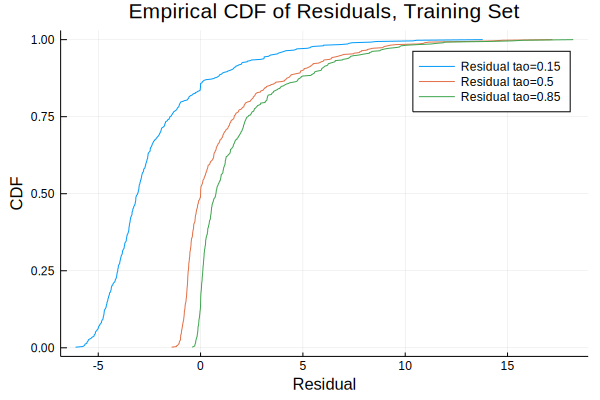

In [102]:
# Report overestimates and plot emprical cdf of residuals for training set

numOver1 = 0
numOver2 = 0
numOver3 = 0

residuals1 = zeros(size(X_tr2)[1])
residuals2 = zeros(size(X_tr2)[1])
residuals3 = zeros(size(X_tr2)[1])

for i = 1:size(X_tr2)[1]
    # Count the number of over estimates
    if (dot(X_tr2[i, :], theta_ta1)) > Y_tr2[i]
        numOver1 += 1
    end
    if (dot(X_tr2[i, :], theta_ta2)) > Y_tr2[i]
        numOver2 += 1
    end
    if (dot(X_tr2[i, :], theta_ta3)) > Y_tr2[i]
        numOver3 += 1
    end
    
    # Calculate residual
    residuals1[i] = (dot(X_tr2[i,:], theta_ta1) - Y_tr2[i])
    residuals2[i] = (dot(X_tr2[i,:], theta_ta2) - Y_tr2[i])
    residuals3[i] = (dot(X_tr2[i,:], theta_ta3) - Y_tr2[i])
end

OverEstFreq1 = numOver1 / size(X_tr2)[1]
OverEstFreq2 = numOver2 / size(X_tr2)[1]
OverEstFreq3 = numOver3 / size(X_tr2)[1]

@show OverEstFreq1
@show OverEstFreq2
@show OverEstFreq3

d1 = length(residuals1)
d2 = length(residuals2)
d3 = length(residuals3)

plot(sort(residuals1), collect(1:d1)/d1, label="Residual tao=0.15")
plot!(sort(residuals2), collect(1:d2)/d2, label="Residual tao=0.5")
plot!(sort(residuals3), collect(1:d3)/d3, label="Residual tao=0.85")
xlabel!("Residual")
ylabel!("CDF")
title!("Empirical CDF of Residuals, Training Set")




OverEstFreq1_test = 0.148
OverEstFreq2_test = 0.528
OverEstFreq3_test = 0.818


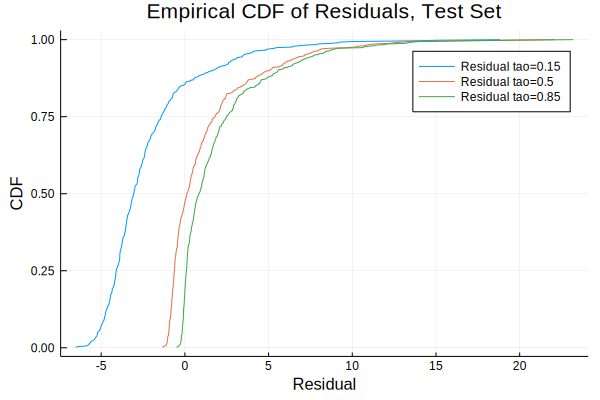

In [103]:
# Report overestimates and plot emprical cdf of residuals for training set

numOver1_test = 0
numOver2_test = 0
numOver3_test = 0

residuals1_test = zeros(size(X_te2)[1])
residuals2_test = zeros(size(X_te2)[1])
residuals3_test = zeros(size(X_te2)[1])

for i = 1:size(X_te2)[1]
    # Count the number of over estimates
    if (dot(X_te2[i, :], theta_ta1)) > Y_te2[i]
        numOver1_test += 1
    end
    if (dot(X_te2[i, :], theta_ta2)) > Y_te2[i]
        numOver2_test += 1
    end
    if (dot(X_te2[i, :], theta_ta3)) > Y_te2[i]
        numOver3_test += 1
    end
    
    # Calculate residual
    residuals1_test[i] = (dot(X_te2[i,:], theta_ta1) - Y_te2[i])
    residuals2_test[i] = (dot(X_te2[i,:], theta_ta2) - Y_te2[i])
    residuals3_test[i] = (dot(X_te2[i,:], theta_ta3) - Y_te2[i])
end

OverEstFreq1_test = numOver1_test / size(X_te2)[1]
OverEstFreq2_test = numOver2_test / size(X_te2)[1]
OverEstFreq3_test = numOver3_test / size(X_te2)[1]

@show OverEstFreq1_test
@show OverEstFreq2_test
@show OverEstFreq3_test

d1_test = length(residuals1_test)
d2_test = length(residuals2_test)
d3_test = length(residuals3_test)

plot(sort(residuals1_test), collect(1:d1_test)/d1_test, label="Residual tao=0.15")
plot!(sort(residuals2_test), collect(1:d2_test)/d2_test, label="Residual tao=0.5")
plot!(sort(residuals3_test), collect(1:d3_test)/d3_test, label="Residual tao=0.85")
xlabel!("Residual")
ylabel!("CDF")
title!("Empirical CDF of Residuals, Test Set")